# Preamble:

Purpose: Analyze the marriage data to create an analysis dataset.

Author: Justin(Jiazhou) Bi

Date: 23 September 2024

Contact: justin.bi@mail.utoronto.ca

Pre-requisites: Raw data available for download in notebook: 01-download_data.ipynb, and data cleaning part is available in 02-data_cleaning.ipynb

In [43]:
# Loading necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Loading the DataFrame for the analysis
df = pd.read_csv('/Users/jiazhoubi/Desktop/UT MI/INF 3104/reported-crime/data/analysis_data/analysis_data.csv')
df.head()

,REPORT_YEAR,CATEGORY,SUBTYPE,COUNT,COUNT_CLEARED,CASE_CLEARING_RATE
0,2022,Crimes Against Property,Auto Theft,79,0,0.0
1,2023,Crimes Against Property,Break & Enter-House,1,0,0.0
2,2014,Crimes Against Property,Auto Theft,7,0,0.0
3,2021,Crimes Against the Person,Sexual Violation,1,0,0.0
4,2020,Crimes Against Property,Break & Enter-Apartment,2,0,0.0


## Number of Report Cases vs Year

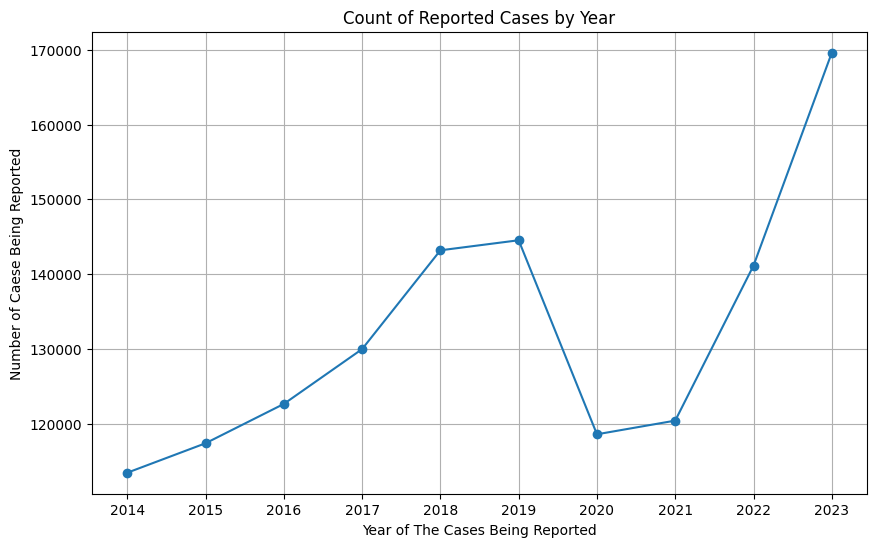

In [45]:
grouped_by_year_df = df.groupby('REPORT_YEAR')['COUNT'].sum().reset_index()
plt.figure(figsize = (10,6))
plt.plot(grouped_by_year_df['REPORT_YEAR'], grouped_by_year_df['COUNT'], marker = 'o', linestyle = 'solid')
plt.xlabel('Year of The Cases Being Reported')
plt.ylabel('Number of Caese Being Reported')
plt.title('Count of Reported Cases by Year')
plt.xticks(grouped_by_year_df['REPORT_YEAR'])
plt.grid(True)
plt.show()

## Number of Report Cases vs Year

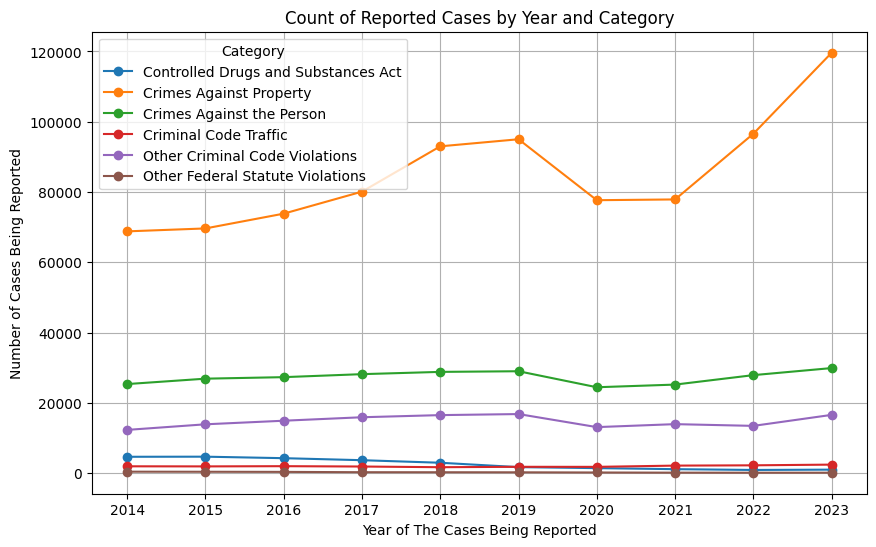

In [46]:
grouped_by_year_category_df = df.groupby(['REPORT_YEAR', 'CATEGORY'])['COUNT'].sum().reset_index()
plt.figure(figsize=(10, 6))
for category in grouped_by_year_category_df['CATEGORY'].unique():
    category_data = grouped_by_year_category_df[grouped_by_year_category_df['CATEGORY'] == category]
    plt.plot(category_data['REPORT_YEAR'], category_data['COUNT'], marker='o', linestyle='solid', label=category)
plt.xlabel('Year of The Cases Being Reported')
plt.ylabel('Number of Cases Being Reported')
plt.title('Count of Reported Cases by Year and Category')
plt.xticks(grouped_by_year_category_df['REPORT_YEAR'].unique())
plt.legend(title='Category')
plt.grid(True)
plt.show()

## Subtype of Crimes Against Property by Year

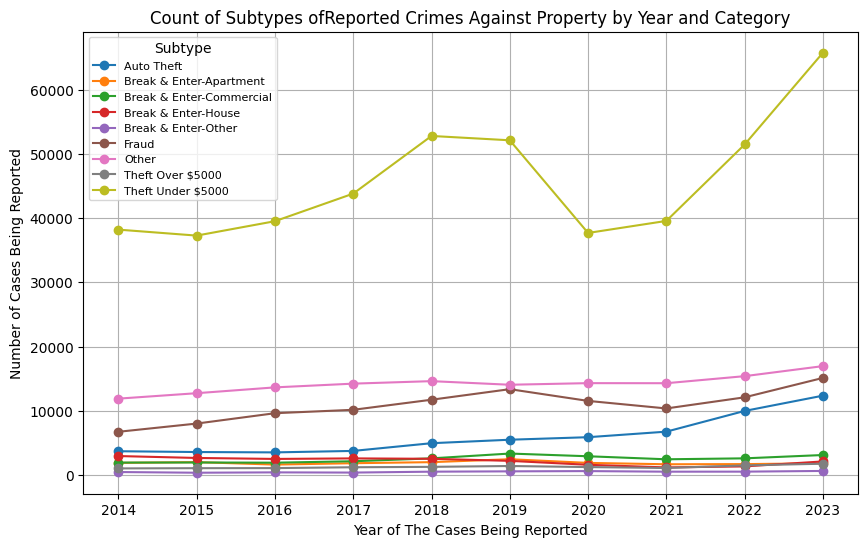

In [47]:
crime_against_property_df = df[df['CATEGORY'] == 'Crimes Against Property']
#crime_against_property_df.head()
grouped_by_year_subtype_df = crime_against_property_df.groupby(['REPORT_YEAR','SUBTYPE'])['COUNT'].sum().reset_index()
plt.figure(figsize=(10,6))
for subtype in grouped_by_year_subtype_df['SUBTYPE'].unique():
    subtype_data = grouped_by_year_subtype_df[grouped_by_year_subtype_df['SUBTYPE'] == subtype]
    plt.plot(subtype_data['REPORT_YEAR'],subtype_data['COUNT'],marker = 'o', linestyle = 'solid', label=subtype)
plt.xlabel('Year of The Cases Being Reported')
plt.ylabel('Number of Cases Being Reported')
plt.title('Count of Subtypes ofReported Crimes Against Property by Year and Category')
plt.xticks(grouped_by_year_subtype_df['REPORT_YEAR'].unique())
plt.legend(title='Subtype',loc = 'upper left',fontsize = 8)
plt.grid(True)
plt.show()

# Growth Rate of Crime Subtypes from 2014 to 2023

In [48]:
data_2014 = grouped_by_year_subtype_df[grouped_by_year_subtype_df['REPORT_YEAR'] == 2014]
data_2023 = grouped_by_year_subtype_df[grouped_by_year_subtype_df['REPORT_YEAR'] == 2023]
merged_data_count = pd.merge(data_2014, data_2023, on='SUBTYPE', suffixes=('_2014', '_2023'))
merged_data_count['percentage_increase'] = ((merged_data_count['COUNT_2023'] - merged_data_count['COUNT_2014']) / merged_data_count['COUNT_2014']) * 100
merged_data_count[['SUBTYPE', 'COUNT_2014', 'COUNT_2023', 'percentage_increase']]

,SUBTYPE,COUNT_2014,COUNT_2023,percentage_increase
0,Auto Theft,3702,12356,233.765532
1,Break & Enter-Apartment,1885,1820,-3.448276
2,Break & Enter-Commercial,1933,3111,60.941542
3,Break & Enter-House,2951,2113,-28.397154
4,Break & Enter-Other,462,631,36.580087
5,Fraud,6729,15118,124.669342
6,Other,11892,16957,42.591658
7,Theft Over $5000,1025,1758,71.512195
8,Theft Under $5000,38214,65765,72.096614


# Crime Subtype Clear Rate from 2014 to 2023

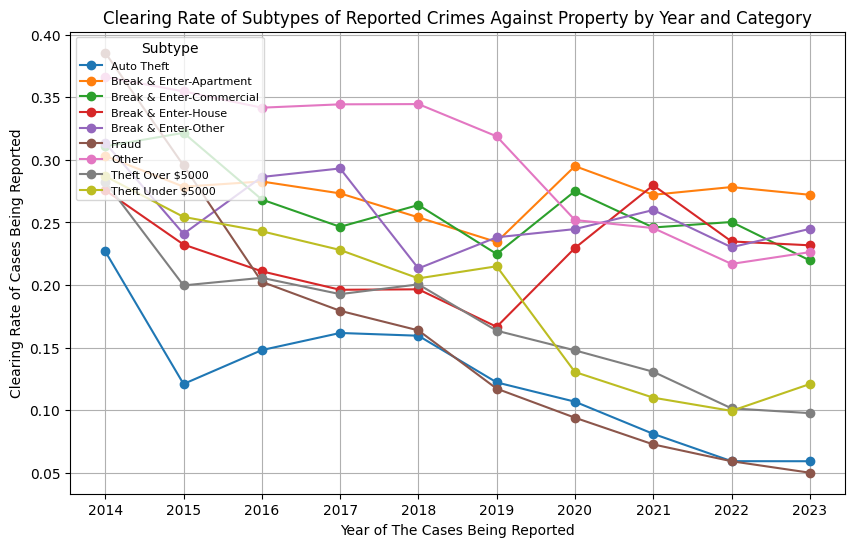

In [49]:
grouped_by_year_subtype_df = crime_against_property_df.groupby(['REPORT_YEAR','SUBTYPE'])['CASE_CLEARING_RATE'].mean().reset_index()
plt.figure(figsize=(10,6))
for subtype in grouped_by_year_subtype_df['SUBTYPE'].unique():
    subtype_data = grouped_by_year_subtype_df[grouped_by_year_subtype_df['SUBTYPE'] == subtype]
    plt.plot(subtype_data['REPORT_YEAR'],subtype_data['CASE_CLEARING_RATE'],marker = 'o', linestyle = 'solid', label=subtype)
plt.xlabel('Year of The Cases Being Reported')
plt.ylabel('Clearing Rate of Cases Being Reported')
plt.title('Clearing Rate of Subtypes of Reported Crimes Against Property by Year and Category')
plt.xticks(grouped_by_year_subtype_df['REPORT_YEAR'].unique())
plt.legend(title='Subtype',loc = 'upper left',fontsize = 8)
plt.grid(True)
plt.show()

# Growth Rate of Case Cleaering Rate by Subtypes from 2014 to 2023

In [52]:
data_2014 = grouped_by_year_subtype_df[grouped_by_year_subtype_df['REPORT_YEAR'] == 2014]
data_2023 = grouped_by_year_subtype_df[grouped_by_year_subtype_df['REPORT_YEAR'] == 2023]
merged_data = pd.merge(data_2014, data_2023, on='SUBTYPE', suffixes=('_2014', '_2023'))
merged_data['percentage_increase'] = ((merged_data['CASE_CLEARING_RATE_2023'] - merged_data['CASE_CLEARING_RATE_2014']) / merged_data['CASE_CLEARING_RATE_2014']) * 100
merged_data[['SUBTYPE', 'CASE_CLEARING_RATE_2014', 'CASE_CLEARING_RATE_2023', 'percentage_increase']]

,SUBTYPE,CASE_CLEARING_RATE_2014,CASE_CLEARING_RATE_2023,percentage_increase
0,Auto Theft,0.226869,0.059213,-73.899740
1,Break & Enter-Apartment,0.303149,0.272071,-10.251820
2,Break & Enter-Commercial,0.310787,0.219633,-29.330009
3,Break & Enter-House,0.275673,0.231720,-15.943819
4,Break & Enter-Other,0.313474,0.244845,-21.892974
5,Fraud,0.385564,0.050036,-87.022533
6,Other,0.366228,0.226262,-38.218145
7,Theft Over $5000,0.282407,0.097643,-65.424676
8,Theft Under $5000,0.286875,0.120876,-57.864647
